In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [9]:
# Parameter dari data
N = 275501339  # Total populasi
alpha = 0.0000455  # Tingkat kelahiran harian
mu = 6.4e-8  # Tingkat kematian alami
beta1 = 0.5  # Estimasi tingkat infeksi untuk S
beta2 = 0.3  # Estimasi tingkat infeksi untuk V
beta3 = 0.2  # Estimasi tingkat infeksi untuk Vm
gamma1 = 0.653  # Efektivitas vaksin
gamma2 = 0.01  # Pertumbuhan populasi misinformed
gamma3 = 1 / 14  # Tingkat pemulihan
gamma = 1 / 210  # Kehilangan kekebalan (6-8 bulan)


In [10]:
# Populasi awal
I0 = 520000  # Kasus aktif awal
R0 = 508000  # Kasus sembuh awal
V0 = 161861222  # Populasi divaksin
Vm0 = 0.27 * N  # Populasi misinformed
S0 = N - I0 - R0 - V0 - Vm0  # Sisanya adalah populasi rentan

In [11]:
# Waktu simulasi (dalam hari)
t_start = 0
t_end = 365

In [12]:
def svmir_model(t, y):
    S, V, Vm, I, R = y
    dSdt = alpha * N - (beta1 * S * I) / N - gamma1 * S - gamma2 * S - mu * S
    dVdt = gamma1 * S - (beta2 * V * I) / N - mu * V
    dVmdt = gamma2 * S - (beta3 * Vm * I) / N - mu * Vm
    dIdt = (beta1 * S * I) / N + (beta2 * V * I) / N + (beta3 * Vm * I) / N - gamma3 * I - mu * I
    dRdt = gamma3 * I - mu * R
    return [dSdt, dVdt, dVmdt, dIdt, dRdt]


In [13]:
# Kondisi awal
y0 = [S0, V0, Vm0, I0, R0]

# Penyelesaian persamaan diferensial
solution = solve_ivp(svmir_model, [t_start, t_end], y0, t_eval=np.linspace(t_start, t_end, 365))

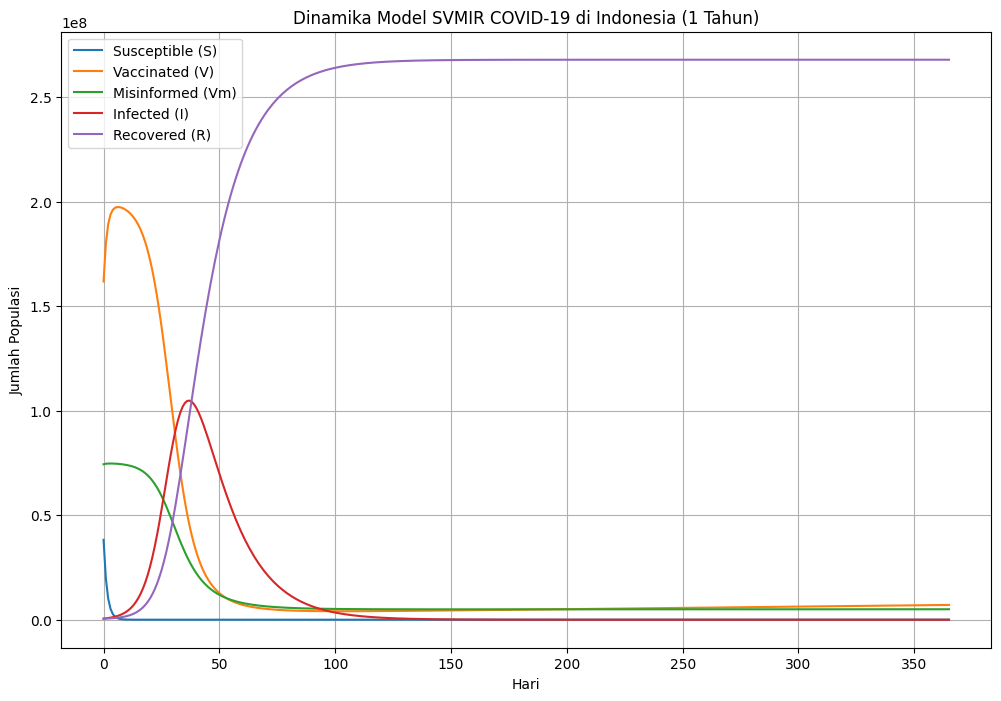

In [14]:
# Plot hasil
plt.figure(figsize=(12, 8))
plt.plot(solution.t, solution.y[0], label='Susceptible (S)')
plt.plot(solution.t, solution.y[1], label='Vaccinated (V)')
plt.plot(solution.t, solution.y[2], label='Misinformed (Vm)')
plt.plot(solution.t, solution.y[3], label='Infected (I)')
plt.plot(solution.t, solution.y[4], label='Recovered (R)')

plt.title('Dinamika Model SVMIR COVID-19 di Indonesia (1 Tahun)')
plt.xlabel('Hari')
plt.ylabel('Jumlah Populasi')
plt.legend()
plt.grid()
plt.show()

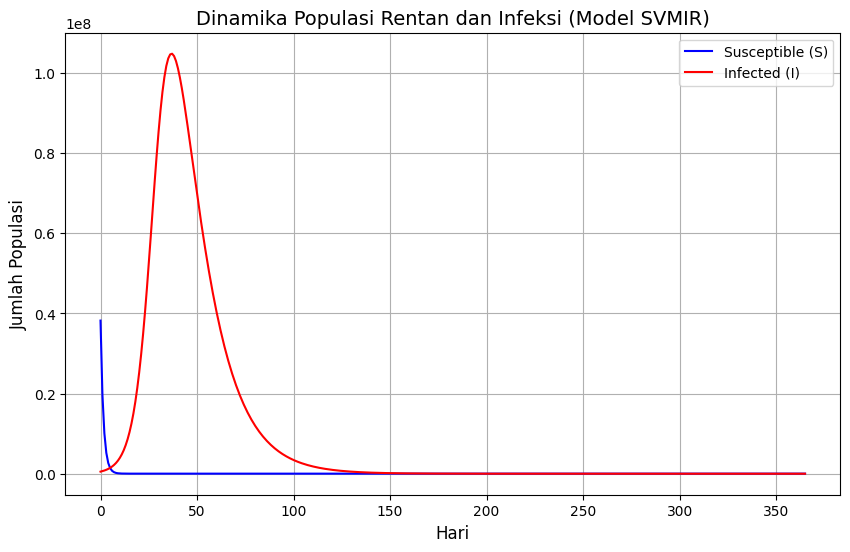

In [15]:
# Visualisasi untuk Populasi Rentan dan Infeksi
plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[0], label='Susceptible (S)', color='blue')
plt.plot(solution.t, solution.y[3], label='Infected (I)', color='red')

plt.title('Dinamika Populasi Rentan dan Infeksi (Model SVMIR)', fontsize=14)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Jumlah Populasi', fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()

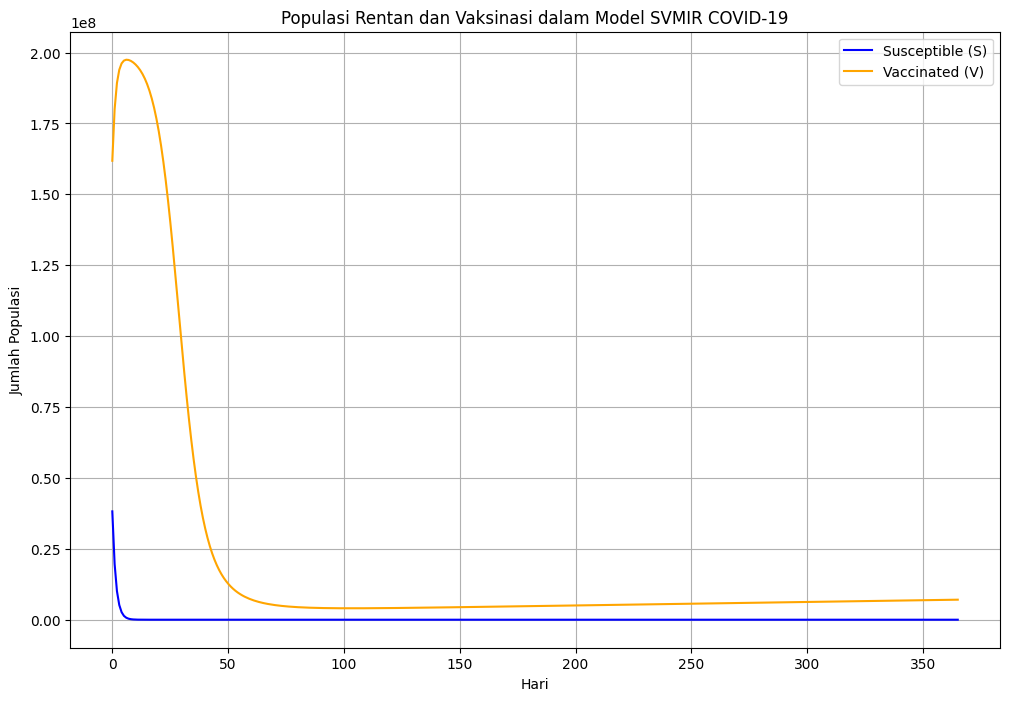

In [16]:
# Visualisasi untuk melihat populasi vaksinasi (V) dan populasi rentan (S)
plt.figure(figsize=(12, 8))
plt.plot(solution.t, solution.y[0], label='Susceptible (S)', color='blue', linestyle='-')
plt.plot(solution.t, solution.y[1], label='Vaccinated (V)', color='orange', linestyle='-')
plt.title('Populasi Rentan dan Vaksinasi dalam Model SVMIR COVID-19')
plt.xlabel('Hari')
plt.ylabel('Jumlah Populasi')
plt.legend()
plt.grid()
plt.show()

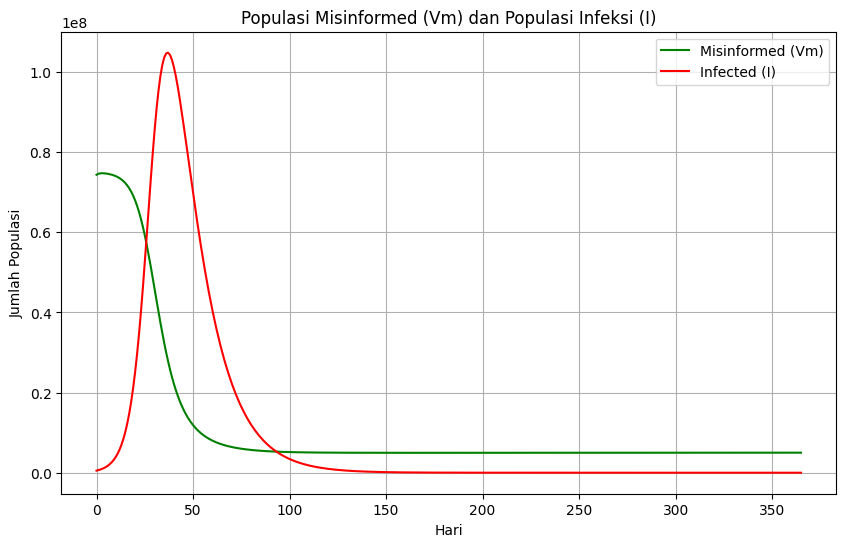

In [17]:
# Visualisasi untuk populasi misinformed (Vm) dan populasi infeksi (I)
plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[2], label='Misinformed (Vm)', color='green')
plt.plot(solution.t, solution.y[3], label='Infected (I)', color='red')
plt.title('Populasi Misinformed (Vm) dan Populasi Infeksi (I)')
plt.xlabel('Hari')
plt.ylabel('Jumlah Populasi')
plt.legend()
plt.grid()
plt.show()


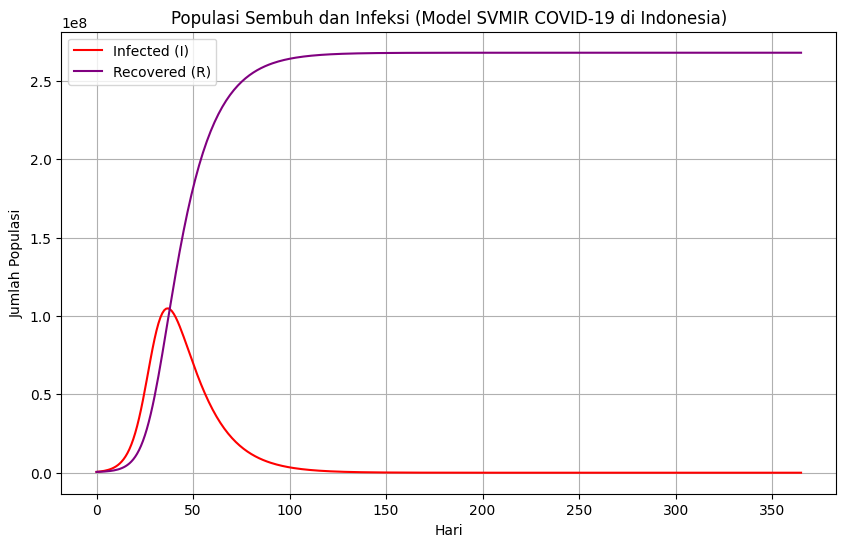

In [18]:
# Visualisasi untuk populasi sembuh (Recovered) dan infeksi (Infected)
plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[3], label='Infected (I)', color='red')
plt.plot(solution.t, solution.y[4], label='Recovered (R)', color='purple')
plt.title('Populasi Sembuh dan Infeksi (Model SVMIR COVID-19 di Indonesia)')
plt.xlabel('Hari')
plt.ylabel('Jumlah Populasi')
plt.legend()
plt.grid()
plt.show()
